Please write your name and student id here:

### Exercise: Clustering

File exercise5.csv contains synthetic data about salary, housecare time, height and weight of some individuals. It also contains an indicator variable M/F to indicate whether the individual in question is female/male. In this exercise you should try out both KMeans and GaussianMixture (note: we will discuss GMM in 27th Nov meeting but you can get started with the exercise now) to cluster the individuals based on salary, housecare time, height and weight (ie. don't use the M/F information in clustering).

After clustering, try and analyse how well the clustering worked out by comparing statistics of the clusters with statistics calculated from the data (in this step you can use the M/F indicator variable).

In [1]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from scipy.stats import norm
import math
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LinearRegression
from scipy.stats import multivariate_normal
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#### Step 1: Read input (1p)

Read in the dataset in exercise3.csv. Check genfromtxt() documentation and choose right delimiter and skip_header parameter values.

In [2]:
data = genfromtxt('clustering.csv' , delimiter= ',', skip_header=1)
print(data.shape)

(51, 5)


In [3]:
assert(data.shape[1] == 5)

#### Step 2: Scale (1p)

In [4]:
# assign to x the data excluding class info (last column) that gets assigned to y
# scale x data (assign scaler object to variable scaler) and assign to scaled_x

x = data[:, :-1]
y = data[:, -1]
scaler = StandardScaler().fit(x)
scaled_x = scaler.transform(x)

In [5]:
# if this cell passes silently, data shapes are ok
assert(x.shape[1] == 4)
assert(y.shape[0] == 51)

#### Step 3: KMeans clustering (2p)

Cluster the data with KMeans. Assign the fitted KMeans object to variable kmeans. Compute per cluster means and compare with from sample data.

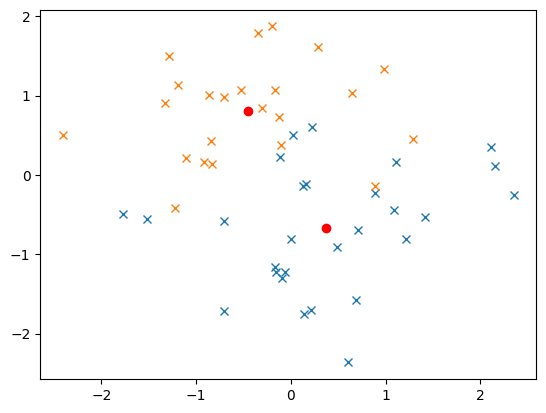

In [7]:
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(scaled_x)
plt.figure(figsize=(10,6))
plt.plot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 'ro', label='Cluster Centers')

y = kmeans.labels_
for c in range(n_clusters):
    plt.plot(scaled_x[y==c,0], scaled_x[y==c,1], 'x')

plt.show()

In [8]:
# print out feature means for the clusters
print("Cluster 0 means", np.mean(scaler.inverse_transform(scaled_x[kmeans.labels_ == 0]),axis=0))
print("Cluster 1 means", np.mean(scaler.inverse_transform(scaled_x[kmeans.labels_ == 1]),axis=0))

Cluster 0 means [3129.21428571  153.57142857  174.85714286   79.21428571]
Cluster 1 means [2660.39130435  244.95652174  159.34782609   69.2173913 ]


#### Step 4: GMM (2p)

Perform soft (Gaussian) clustering of the data. Compare the per class cluster means with means from sample data.

In [11]:
# gmm = ...
# print("Cluster means", ...)
n_components=2
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(scaled_x)
labels = gmm.predict(scaled_x)
print("Cluster 0 means:", scaled_x[labels == 0].mean(axis=0))
print("Cluster 1 means:", scaled_x[labels == 1].mean(axis=0))


Cluster 0 means: [ 0.33838742 -0.58845739  0.64651054  0.21719821]
Cluster 1 means: [-0.4834106   0.84065341 -0.92358648 -0.31028316]


#### Step 5: Looking at the results (3p)

Please answer in the cell below.

1. What is the purpose of scaler.inverse_transform() call? Could you avoid it?
2. Which set of mean values represents cluster of females? Does it match the label (0 / 1)? Should it match? Why / why not?
3. Compare the statistics (means, stds etc) from clustered data with those calculated from real sample classes. Any noticable differences?